# Canada Drought Project 

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load Data

 Lets start off reading the csv files by pandas dataframe

In [2]:
train = pd.read_csv('Training_data2.csv')

In [3]:
train.head(3)

,OBJECTID,Training_Dr_rst,X,Y,aspect_recc,soilmois_rec,elevation_Band_1,lake_Band_1,lulc_Band_1,ndvi_Band_1,twi_Band_1,tmaxjuly_2_Band_1,tmax_Band_1,slope_Band_1,road_Band_1,river_Band_1,pcp_Band_1
0,1,1,1076638.532,-618148.1,4,3.0,2,2,2,4.0,5,5,5.0,2,1,3,3.0
1,2,1,1133738.532,-533448.1,4,3.0,3,2,2,4.0,5,5,5.0,2,1,4,3.0
2,3,1,1118838.532,-492348.1,5,3.0,3,2,2,4.0,5,5,5.0,2,1,3,3.0


In [4]:
test = pd.read_csv('Testing_data2.csv')

In [5]:
test.head(3)

,OBJECTID,Testing_Dr_rst,X,Y,aspect_recc,soilmois_rec,elevation_Band_1,lake_Band_1,lulc_Band_1,ndvi_Band_1,twi_Band_1,tmaxjuly_2_Band_1,tmax_Band_1,slope_Band_1,road_Band_1,river_Band_1,pcp_Band_1
0,1,1,1199396.038,-453047.7698,5,3,3,3,11,4,3,5,5,2,1,4,3
1,2,1,1239596.038,-378947.7698,3,4,2,1,4,4,4,5,5,3,0,4,3
2,3,1,1368696.038,-368347.7698,4,4,3,2,4,5,1,5,5,4,1,3,3


In [6]:
test['Testing_Dr_rst'].value_counts()

1    620
0    620
Name: Testing_Dr_rst, dtype: int64

In [7]:
train['Training_Dr_rst'].value_counts()

1    2464
0    2462
Name: Training_Dr_rst, dtype: int64

In [8]:
train.shape

(4926, 17)

In [9]:
test.shape

(1240, 17)

## Exploratory Data Analysis

### Missing Data

In [10]:
train.columns

Index(['OBJECTID', 'Training_Dr_rst', 'X', 'Y', 'aspect_recc', 'soilmois_rec',
       'elevation_Band_1', 'lake_Band_1', 'lulc_Band_1', 'ndvi_Band_1',
       'twi_Band_1', 'tmaxjuly_2_Band_1', 'tmax_Band_1', 'slope_Band_1',
       'road_Band_1', 'river_Band_1', 'pcp_Band_1'],
      dtype='object')

In [11]:
test.columns

Index(['OBJECTID', 'Testing_Dr_rst', 'X', 'Y', 'aspect_recc', 'soilmois_rec',
       'elevation_Band_1', 'lake_Band_1', 'lulc_Band_1', 'ndvi_Band_1',
       'twi_Band_1', 'tmaxjuly_2_Band_1', 'tmax_Band_1', 'slope_Band_1',
       'road_Band_1', 'river_Band_1', 'pcp_Band_1'],
      dtype='object')

In [12]:
df_train = pd.read_csv ('Training_data2.csv', names= ['OBJECTID', 'Droughts_status', 'X', 'Y', 'Aspect',
                                                    'SoilMoisture', 'Elevation', 'DistFromLake', 'LULC',
                                                    'NDVI', 'TWI', 'TmaxJuly', 'Tmax', 'Slope',
                                                    'DistFromRoad', 'DistFromRiver', 'Precipitation'
                                                   ] 
                       )

In [13]:
df_train.columns

Index(['OBJECTID', 'Droughts_status', 'X', 'Y', 'Aspect', 'SoilMoisture',
       'Elevation', 'DistFromLake', 'LULC', 'NDVI', 'TWI', 'TmaxJuly', 'Tmax',
       'Slope', 'DistFromRoad', 'DistFromRiver', 'Precipitation'],
      dtype='object')

In [14]:
test.columns

Index(['OBJECTID', 'Testing_Dr_rst', 'X', 'Y', 'aspect_recc', 'soilmois_rec',
       'elevation_Band_1', 'lake_Band_1', 'lulc_Band_1', 'ndvi_Band_1',
       'twi_Band_1', 'tmaxjuly_2_Band_1', 'tmax_Band_1', 'slope_Band_1',
       'road_Band_1', 'river_Band_1', 'pcp_Band_1'],
      dtype='object')

In [15]:
df_test = pd.read_csv ('Testing_data2.csv', names= ['OBJECTID', 'Droughts_status', 'X', 'Y', 'Aspect',
                                                    'SoilMoisture', 'Elevation','DistFromLake', 'LULC', 'NDVI',
                                                    'TWI', 'TmaxJuly', 'Tmax', 'Slope',
                                                    'DistFromRoad', 'DistFromRiver', 'Precipitation'
                                                   ] 
                       )

In [16]:
df_test.head()

,OBJECTID,Droughts_status,X,Y,Aspect,SoilMoisture,Elevation,DistFromLake,LULC,NDVI,TWI,TmaxJuly,Tmax,Slope,DistFromRoad,DistFromRiver,Precipitation
0,OBJECTID,Testing_Dr_rst,X,Y,aspect_recc,soilmois_rec,elevation_Band_1,lake_Band_1,lulc_Band_1,ndvi_Band_1,twi_Band_1,tmaxjuly_2_Band_1,tmax_Band_1,slope_Band_1,road_Band_1,river_Band_1,pcp_Band_1
1,1,1,1199396.038,-453047.7698,5,3,3,3,11,4,3,5,5,2,1,4,3
2,2,1,1239596.038,-378947.7698,3,4,2,1,4,4,4,5,5,3,0,4,3
3,3,1,1368696.038,-368347.7698,4,4,3,2,4,5,1,5,5,4,1,3,3
4,4,1,40396.03781,-18347.76982,5,4,3,2,4,4,4,5,5,2,2,3,2


### Removing the header in our Dataset

In [17]:
df_train = pd.read_csv ('Training_data2.csv', names= ['OBJECTID', 'Droughts_status', 'X', 'Y', 'Aspect',
                                                    'SoilMoisture', 'Elevation', 'DistFromLake', 'LULC', 'NDVI',
                                                    'TWI', 'TmaxJuly', 'Tmax', 'Slope',
                                                    'DistFromRoad', 'DistFromRiver', 'Precipitation'
                                                   ],
                        header=0
                       )

In [18]:
df_test = pd.read_csv ('Testing_data2.csv', names= ['OBJECTID', 'Droughts_status', 'X', 'Y', 'Aspect',
                                                    'SoilMoisture', 'Elevation', 'DistFromLake', 'LULC', 'NDVI',
                                                    'TWI', 'TmaxJuly', 'Tmax', 'Slope',
                                                    'DistFromRoad', 'DistFromRiver', 'Precipitation'
                                                   ],
                       header= 0
                       )

In [19]:
df_train.head(3)

,OBJECTID,Droughts_status,X,Y,Aspect,SoilMoisture,Elevation,DistFromLake,LULC,NDVI,TWI,TmaxJuly,Tmax,Slope,DistFromRoad,DistFromRiver,Precipitation
0,1,1,1076638.532,-618148.1,4,3.0,2,2,2,4.0,5,5,5.0,2,1,3,3.0
1,2,1,1133738.532,-533448.1,4,3.0,3,2,2,4.0,5,5,5.0,2,1,4,3.0
2,3,1,1118838.532,-492348.1,5,3.0,3,2,2,4.0,5,5,5.0,2,1,3,3.0


In [20]:
df_test.head(3)

,OBJECTID,Droughts_status,X,Y,Aspect,SoilMoisture,Elevation,DistFromLake,LULC,NDVI,TWI,TmaxJuly,Tmax,Slope,DistFromRoad,DistFromRiver,Precipitation
0,1,1,1199396.038,-453047.7698,5,3,3,3,11,4,3,5,5,2,1,4,3
1,2,1,1239596.038,-378947.7698,3,4,2,1,4,4,4,5,5,3,0,4,3
2,3,1,1368696.038,-368347.7698,4,4,3,2,4,5,1,5,5,4,1,3,3


In [21]:
df_train.dtypes

OBJECTID             int64
Droughts_status      int64
X                  float64
Y                  float64
Aspect               int64
SoilMoisture       float64
Elevation            int64
DistFromLake         int64
LULC                 int64
NDVI               float64
TWI                  int64
TmaxJuly             int64
Tmax               float64
Slope                int64
DistFromRoad         int64
DistFromRiver        int64
Precipitation      float64
dtype: object

In [22]:
df_test.dtypes

OBJECTID             int64
Droughts_status      int64
X                  float64
Y                  float64
Aspect               int64
SoilMoisture         int64
Elevation            int64
DistFromLake         int64
LULC                 int64
NDVI                 int64
TWI                  int64
TmaxJuly             int64
Tmax                 int64
Slope                int64
DistFromRoad         int64
DistFromRiver        int64
Precipitation        int64
dtype: object

In [23]:
# check number of number of unique values
{col : df_train[col].nunique() for col in df_train}

{'OBJECTID': 4926,
 'Droughts_status': 2,
 'X': 4318,
 'Y': 4172,
 'Aspect': 5,
 'SoilMoisture': 4,
 'Elevation': 5,
 'DistFromLake': 5,
 'LULC': 10,
 'NDVI': 5,
 'TWI': 5,
 'TmaxJuly': 5,
 'Tmax': 5,
 'Slope': 5,
 'DistFromRoad': 5,
 'DistFromRiver': 5,
 'Precipitation': 5}

In [24]:
# check number of unique values
{col : df_test[col].nunique() for col in df_test}

{'OBJECTID': 1240,
 'Droughts_status': 2,
 'X': 1195,
 'Y': 1186,
 'Aspect': 5,
 'SoilMoisture': 4,
 'Elevation': 5,
 'DistFromLake': 5,
 'LULC': 10,
 'NDVI': 5,
 'TWI': 5,
 'TmaxJuly': 5,
 'Tmax': 5,
 'Slope': 5,
 'DistFromRoad': 5,
 'DistFromRiver': 5,
 'Precipitation': 5}

In [25]:
df_train['LULC'].value_counts()

4     1850
2     1110
3      709
8      368
11     345
5      292
6      153
10      57
9       35
1        7
Name: LULC, dtype: int64

In [26]:
df_test['LULC'].value_counts()

4     478
2     267
3     167
8     104
5      91
11     72
6      36
9      11
10      9
1       5
Name: LULC, dtype: int64

In [27]:
df_train['SoilMoisture'].value_counts()

1.0    2661
2.0    1414
3.0     616
4.0     234
Name: SoilMoisture, dtype: int64

In [28]:
df_test['SoilMoisture'].value_counts()

1    647
2    377
3    158
4     58
Name: SoilMoisture, dtype: int64

In [29]:
df_train = df_train.astype(
    {
        'Droughts_status': 'category',
        'Aspect': 'category',
        'Elevation': 'category',
        'DistFromLake': 'category',
        'LULC': 'category',
        'NDVI': 'category',
        'TWI': 'category',
        'TmaxJuly': 'category',
        'Tmax': 'category',
        'SoilMoisture': 'category',
        'Slope': 'category',
        'DistFromRoad': 'category',
        'DistFromRiver': 'category',
        'Precipitation': 'category',
    }
)

In [30]:
df_test = df_test.astype(
    {
        'Droughts_status': 'category',
        'Aspect': 'category',
        'Elevation': 'category',
        'DistFromLake': 'category',
        'LULC': 'category',
        'NDVI': 'category',
        'TWI': 'category',
        'TmaxJuly': 'category',
        'Tmax': 'category',
        'SoilMoisture': 'category',
        'Slope': 'category',
        'DistFromRoad': 'category',
        'DistFromRiver': 'category',
        'Precipitation': 'category',
    }
)

In [31]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4926 entries, 0 to 4925
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   OBJECTID         4926 non-null   int64   
 1   Droughts_status  4926 non-null   category
 2   X                4926 non-null   float64 
 3   Y                4926 non-null   float64 
 4   Aspect           4926 non-null   category
 5   SoilMoisture     4925 non-null   category
 6   Elevation        4926 non-null   category
 7   DistFromLake     4926 non-null   category
 8   LULC             4926 non-null   category
 9   NDVI             4925 non-null   category
 10  TWI              4926 non-null   category
 11  TmaxJuly         4926 non-null   category
 12  Tmax             4925 non-null   category
 13  Slope            4926 non-null   category
 14  DistFromRoad     4926 non-null   category
 15  DistFromRiver    4926 non-null   category
 16  Precipitation    4925 non-null   category


In [32]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1240 entries, 0 to 1239
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   OBJECTID         1240 non-null   int64   
 1   Droughts_status  1240 non-null   category
 2   X                1240 non-null   float64 
 3   Y                1240 non-null   float64 
 4   Aspect           1240 non-null   category
 5   SoilMoisture     1240 non-null   category
 6   Elevation        1240 non-null   category
 7   DistFromLake     1240 non-null   category
 8   LULC             1240 non-null   category
 9   NDVI             1240 non-null   category
 10  TWI              1240 non-null   category
 11  TmaxJuly         1240 non-null   category
 12  Tmax             1240 non-null   category
 13  Slope            1240 non-null   category
 14  DistFromRoad     1240 non-null   category
 15  DistFromRiver    1240 non-null   category
 16  Precipitation    1240 non-null   category


In [33]:
df_train.shape

(4926, 17)

In [34]:
df_test.shape

(1240, 17)

In [35]:
# Check for missing values
print(df_train.isnull().sum())

OBJECTID           0
Droughts_status    0
X                  0
Y                  0
Aspect             0
SoilMoisture       1
Elevation          0
DistFromLake       0
LULC               0
NDVI               1
TWI                0
TmaxJuly           0
Tmax               1
Slope              0
DistFromRoad       0
DistFromRiver      0
Precipitation      1
dtype: int64


In [36]:
# Check for missing values
print(df_test.isnull().sum())

OBJECTID           0
Droughts_status    0
X                  0
Y                  0
Aspect             0
SoilMoisture       0
Elevation          0
DistFromLake       0
LULC               0
NDVI               0
TWI                0
TmaxJuly           0
Tmax               0
Slope              0
DistFromRoad       0
DistFromRiver      0
Precipitation      0
dtype: int64


In [37]:
df_train[df_train.isnull().any(axis=1)]

,OBJECTID,Droughts_status,X,Y,Aspect,SoilMoisture,Elevation,DistFromLake,LULC,NDVI,TWI,TmaxJuly,Tmax,Slope,DistFromRoad,DistFromRiver,Precipitation
2537,2538,0,305113.0999,-75140.59501,2,NaN,3,3,11,NaN,4,5,NaN,2,2,1,NaN


In [38]:
df_test[df_test.isnull().any(axis=1)]

,OBJECTID,Droughts_status,X,Y,Aspect,SoilMoisture,Elevation,DistFromLake,LULC,NDVI,TWI,TmaxJuly,Tmax,Slope,DistFromRoad,DistFromRiver,Precipitation


In [39]:
# Drop rows with null values
df_train_cleaned = df_train.dropna()

In [40]:
df_train_cleaned[df_train.isnull().any(axis=1)]

/tmp/ipykernel_250/1853348663.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_train_cleaned[df_train.isnull().any(axis=1)]


,OBJECTID,Droughts_status,X,Y,Aspect,SoilMoisture,Elevation,DistFromLake,LULC,NDVI,TWI,TmaxJuly,Tmax,Slope,DistFromRoad,DistFromRiver,Precipitation


## Visualization

<AxesSubplot:xlabel='Droughts_status', ylabel='count'>

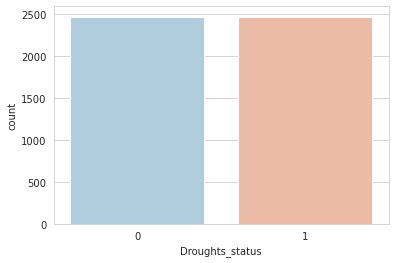

In [41]:
sns.set_style('whitegrid')
sns.countplot (x= 'Droughts_status', data= df_train, palette= 'RdBu_r')

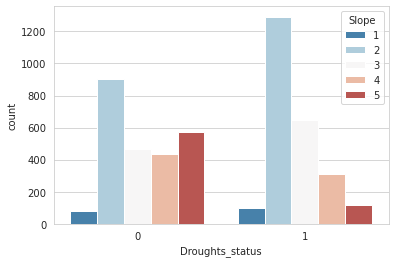

In [42]:
sns.set_style('whitegrid')
fig, ax = plt.subplots()
sns.countplot(x= 'Droughts_status', hue= 'Slope', data= df_train, palette= 'RdBu_r')

plt.show()

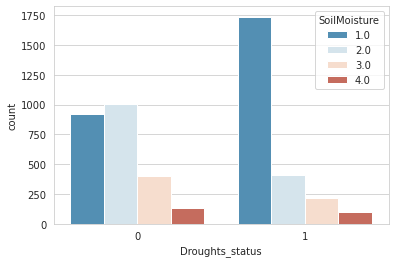

In [43]:
sns.set_style('whitegrid')
fig, ax = plt.subplots()

# Create the countplot
sns.countplot(x='Droughts_status', hue='SoilMoisture', data=df_train, palette='RdBu_r')

plt.show()


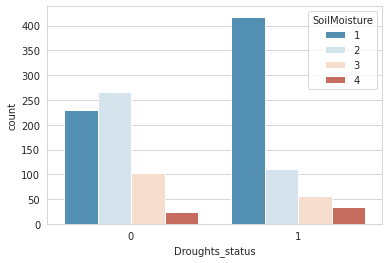

In [44]:
sns.set_style('whitegrid')
fig, ax = plt.subplots()

# Create the countplot
sns.countplot(x='Droughts_status', hue='SoilMoisture', data=df_test, palette='RdBu_r')

plt.show()


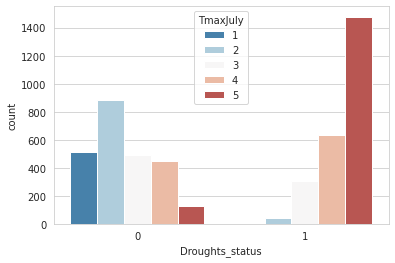

In [45]:
sns.set_style('whitegrid')
fig, ax = plt.subplots()

# Create the countplot
sns.countplot(x='Droughts_status', hue='TmaxJuly', data=df_train, palette='RdBu_r')

plt.show()


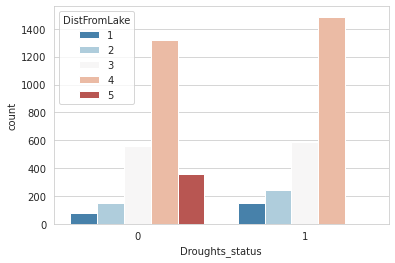

In [46]:
sns.set_style('whitegrid')
fig, ax = plt.subplots()

# Create the countplot
sns.countplot(x='Droughts_status', hue='DistFromLake', data=df_train, palette='RdBu_r')

plt.show()


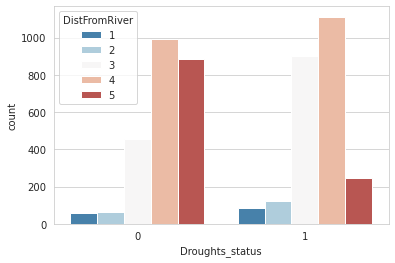

In [47]:
sns.set_style('whitegrid')
fig, ax = plt.subplots()

# Create the countplot
sns.countplot(x='Droughts_status', hue='DistFromRiver', data=df_train, palette='RdBu_r')

plt.show()


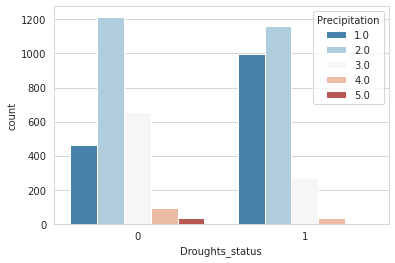

In [48]:
sns.set_style('whitegrid')
fig, ax = plt.subplots()

# Create the countplot
sns.countplot(x='Droughts_status', hue='Precipitation', data=df_train, palette='RdBu_r')

plt.show()


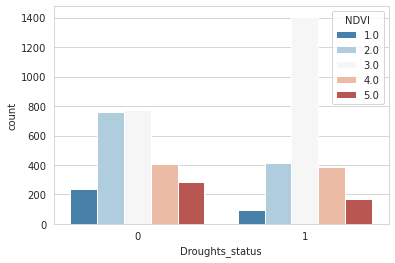

In [49]:
sns.set_style('whitegrid')
fig, ax = plt.subplots()

# Create the countplot
sns.countplot(x='Droughts_status', hue='NDVI', data=df_train, palette='RdBu_r')

plt.show()


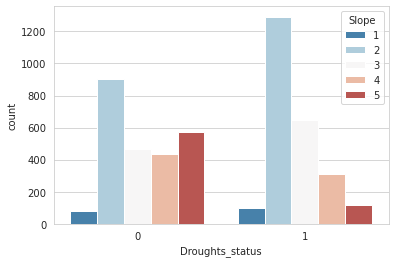

In [50]:
sns.set_style('whitegrid')
fig, ax = plt.subplots()

# Create the countplot
sns.countplot(x='Droughts_status', hue='Slope', data=df_train, palette='RdBu_r')

plt.show()


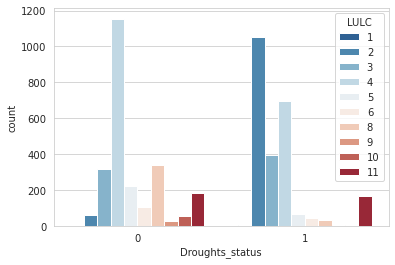

In [51]:
sns.set_style('whitegrid')
fig, ax = plt.subplots()

# Create the countplot
sns.countplot(x='Droughts_status', hue='LULC', data=df_train, palette='RdBu_r')

plt.show()


#### Drop Column 'OBJECTID' from the training and testing data 

In [52]:
# Drop column "OBJECT ID"
columns_to_drop = ['OBJECTID']
df_train_dropped = df_train_cleaned.drop(columns= columns_to_drop)

#Display the result
print (df_train_dropped)

     Droughts_status            X            Y Aspect SoilMoisture Elevation  \
0                  1  1076638.532  -618148.100      4          3.0         2   
1                  1  1133738.532  -533448.100      4          3.0         3   
2                  1  1118838.532  -492348.100      5          3.0         3   
3                  1  1121038.532  -476348.100      4          3.0         3   
4                  1  1111338.532  -464648.100      2          3.0         3   
...              ...          ...          ...    ...          ...       ...   
4921               0 -1591086.900  2801659.405      2          1.0         3   
4922               0 -1569886.900  2808259.405      3          1.0         1   
4923               0 -1580486.900  2814859.405      5          1.0         2   
4924               0 -1590386.900  2828759.405      3          1.0         2   
4925               0 -1601686.900  2826059.405      2          1.0         3   

     DistFromLake LULC NDVI TWI TmaxJul

In [53]:
df_train_dropped.columns

Index(['Droughts_status', 'X', 'Y', 'Aspect', 'SoilMoisture', 'Elevation',
       'DistFromLake', 'LULC', 'NDVI', 'TWI', 'TmaxJuly', 'Tmax', 'Slope',
       'DistFromRoad', 'DistFromRiver', 'Precipitation'],
      dtype='object')

In [54]:
# Drop column "OBJECT ID"
columns_to_drop = ['OBJECTID']
df_test_dropped = df_test.drop(columns= columns_to_drop)

#Display the result
print (df_test_dropped)

     Droughts_status             X             Y Aspect SoilMoisture  \
0                  1  1.199396e+06 -4.530478e+05      5            3   
1                  1  1.239596e+06 -3.789478e+05      3            4   
2                  1  1.368696e+06 -3.683478e+05      4            4   
3                  1  4.039604e+04 -1.834777e+04      5            4   
4                  1  6.819604e+04 -2.447770e+03      3            4   
...              ...           ...           ...    ...          ...   
1235               0 -1.666799e+06  2.740755e+06      3            1   
1236               0 -1.643399e+06  2.767255e+06      5            1   
1237               0 -1.639999e+06  2.780455e+06      3            1   
1238               0 -1.606999e+06  2.801655e+06      2            1   
1239               0 -1.565299e+06  2.795055e+06      3            1   

     Elevation DistFromLake LULC NDVI TWI TmaxJuly Tmax Slope DistFromRoad  \
0            3            3   11    4   3        5    5  

In [55]:
df_train_dropped

,Droughts_status,X,Y,Aspect,SoilMoisture,Elevation,DistFromLake,LULC,NDVI,TWI,TmaxJuly,Tmax,Slope,DistFromRoad,DistFromRiver,Precipitation
0,1,1076638.532,-618148.100,4,3.0,2,2,2,4.0,5,5,5.0,2,1,3,3.0
1,1,1133738.532,-533448.100,4,3.0,3,2,2,4.0,5,5,5.0,2,1,4,3.0
2,1,1118838.532,-492348.100,5,3.0,3,2,2,4.0,5,5,5.0,2,1,3,3.0
3,1,1121038.532,-476348.100,4,3.0,3,2,2,4.0,4,5,5.0,3,1,4,4.0
4,1,1111338.532,-464648.100,2,3.0,3,2,2,4.0,3,5,5.0,2,1,3,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4921,0,-1591086.900,2801659.405,2,1.0,3,5,8,2.0,1,1,2.0,5,4,5,1.0
4922,0,-1569886.900,2808259.405,3,1.0,1,5,5,2.0,2,1,1.0,4,4,5,1.0
4923,0,-1580486.900,2814859.405,5,1.0,2,5,3,2.0,1,1,1.0,5,4,5,1.0
4924,0,-1590386.900,2828759.405,3,1.0,2,5,5,2.0,1,1,1.0,4,4,5,1.0


In [56]:
df_test_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1240 entries, 0 to 1239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Droughts_status  1240 non-null   category
 1   X                1240 non-null   float64 
 2   Y                1240 non-null   float64 
 3   Aspect           1240 non-null   category
 4   SoilMoisture     1240 non-null   category
 5   Elevation        1240 non-null   category
 6   DistFromLake     1240 non-null   category
 7   LULC             1240 non-null   category
 8   NDVI             1240 non-null   category
 9   TWI              1240 non-null   category
 10  TmaxJuly         1240 non-null   category
 11  Tmax             1240 non-null   category
 12  Slope            1240 non-null   category
 13  DistFromRoad     1240 non-null   category
 14  DistFromRiver    1240 non-null   category
 15  Precipitation    1240 non-null   category
dtypes: category(14), float64(2)
memory usage: 

## Multi-Collinearity Analysis

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(df):

    vifs = [variance_inflation_factor(df_train_dropped.values, i) for i in range(df_train_dropped.shape[1])]
    tolerance = [1/vif for vif in vifs]

    vif_data = pd.DataFrame(index=df_train_dropped.columns)
    vif_data['VIF'] = vifs
    vif_data['Tolerance'] = tolerance

    return vif_data

# Calculate VIF 
vif_data = calculate_vif(df_train_dropped)

print(vif_data)

                       VIF  Tolerance
Droughts_status   5.064284   0.197461
X                 3.734021   0.267808
Y                11.482656   0.087088
Aspect            9.244724   0.108170
SoilMoisture      8.493585   0.117736
Elevation        20.412368   0.048990
DistFromLake     21.118603   0.047352
LULC              5.967563   0.167573
NDVI             16.693917   0.059902
TWI              12.797404   0.078141
TmaxJuly         34.830187   0.028711
Tmax             62.668963   0.015957
Slope            24.346758   0.041073
DistFromRoad     11.296672   0.088522
DistFromRiver    22.676787   0.044098
Precipitation    17.085550   0.058529


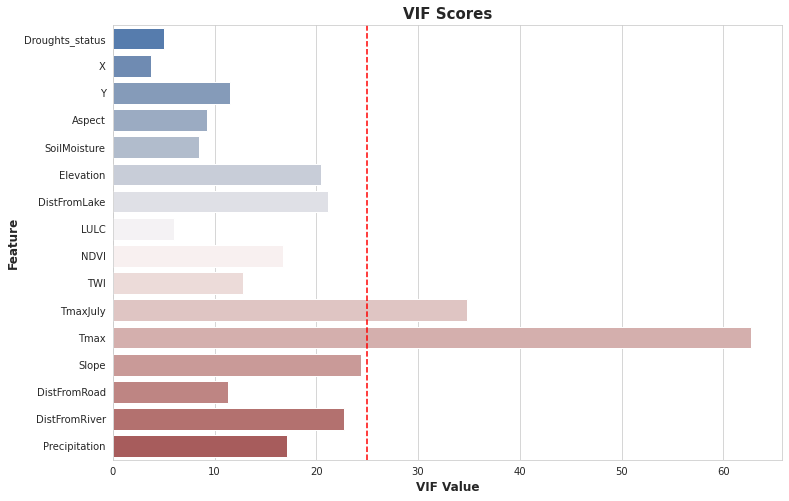

In [58]:
def plot_vif(vif_data):
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(12, 8))

    # Plot the VIF values
    sns.barplot(x=vif_data['VIF'], y=vif_data.index, palette="vlag", ax=ax)
    ax.axvline(x=25, color="red", linestyle="--")  # Add a vertical line at VIF = 30
    ax.set_title('VIF Scores', fontweight='bold', fontsize=15)
    ax.set_xlabel('VIF Value', fontweight='bold', fontsize=12)
    ax.set_ylabel('Feature', fontweight='bold', fontsize=12)

    # Display the plot
    plt.show()

plot_vif(vif_data)


# Feature Importance
It is generally recommended to use feature importance analysis on the training dataset only. \
The purpose of feature importance is to understand the relative importance of features in the context of model training. \
Based on the results of the feature importance analysis, remove the features that are determined to have the least importance. \
This helps in reducing the dimensionality of the dataset and focusing on the most relevant features.

### Random forest classifier

In [59]:
df_train_dropped.columns

Index(['Droughts_status', 'X', 'Y', 'Aspect', 'SoilMoisture', 'Elevation',
       'DistFromLake', 'LULC', 'NDVI', 'TWI', 'TmaxJuly', 'Tmax', 'Slope',
       'DistFromRoad', 'DistFromRiver', 'Precipitation'],
      dtype='object')

In [60]:
df_test_dropped.columns

Index(['Droughts_status', 'X', 'Y', 'Aspect', 'SoilMoisture', 'Elevation',
       'DistFromLake', 'LULC', 'NDVI', 'TWI', 'TmaxJuly', 'Tmax', 'Slope',
       'DistFromRoad', 'DistFromRiver', 'Precipitation'],
      dtype='object')

In [61]:
from sklearn.ensemble import RandomForestClassifier
# Create the feature matrix X and the target variable y

X = df_train_dropped[
    ['Aspect', 'SoilMoisture', 'Elevation', 'DistFromLake', 'LULC', 'NDVI', 'TWI',
     'TmaxJuly', 'Tmax', 'Slope', 'DistFromRoad', 'DistFromRiver', 'Precipitation']
]
y = df_train_dropped['Droughts_status']  # Replace 'target_column' with the name of your target column

# Initialize the random forest classifier
rf = RandomForestClassifier()

# Fit the classifier to the data
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame with feature names and importances
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Calculate the sum of importances
total_importance = feature_importance['Importance'].sum()

# Calculate the weights by dividing each importance by the total importance
feature_importance['Weight'] = feature_importance['Importance'] / total_importance

# Sort the DataFrame by importance in descending order
feature_importance = feature_importance.sort_values('Importance', ascending=False)

# Print the feature importances with weights
print(feature_importance)


          Feature  Importance    Weight
7        TmaxJuly    0.207373  0.207373
10   DistFromRoad    0.154729  0.154729
8            Tmax    0.107854  0.107854
4            LULC    0.086874  0.086874
1    SoilMoisture    0.076991  0.076991
12  Precipitation    0.073175  0.073175
3    DistFromLake    0.057740  0.057740
2       Elevation    0.054784  0.054784
5            NDVI    0.044948  0.044948
11  DistFromRiver    0.042135  0.042135
9           Slope    0.039856  0.039856
6             TWI    0.028706  0.028706
0          Aspect    0.024837  0.024837


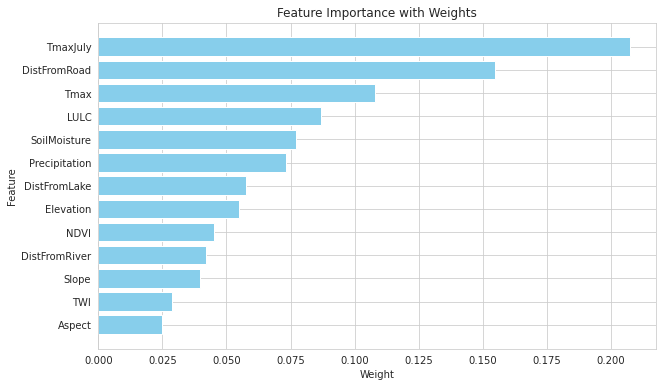

In [62]:
# Create a graph
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Weight'], color='skyblue')
plt.xlabel('Weight')
plt.ylabel('Feature')
plt.title('Feature Importance with Weights')
plt.gca().invert_yaxis()  # Invert the y-axis for better visualization
plt.show()

### SHAP value

* it's better to use SHAP After training model (like a CNN or LSTM) in order to analyze the model.
* Use SHAP values to understand how each geospatial feature (like soil moisture, temperature, etc.) influences the drought prediction.

Overall, this approach is well-suited for understanding how different features contribute to predictions in drought prediction model, which is vital for both model validation and providing insights into the underlying factors affecting drought susceptibility.

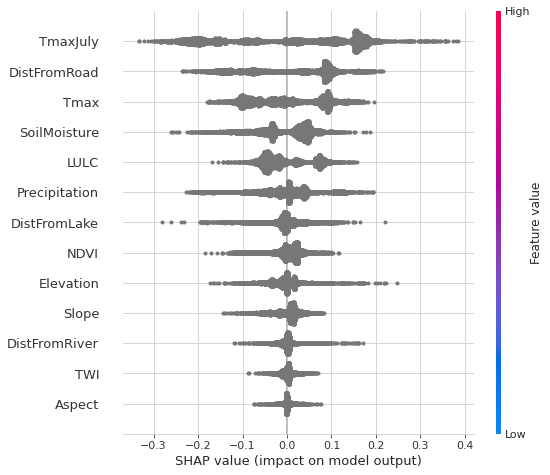

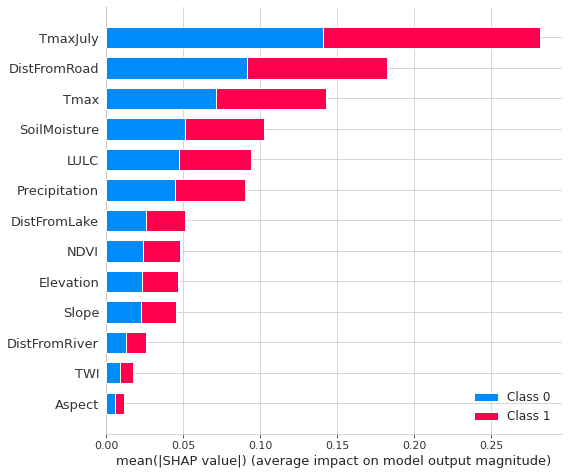

In [63]:
import shap

# Assuming rf is your trained RandomForestClassifier and X is your feature matrix

# Create a SHAP explainer object
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X)

# Plot SHAP values (summary plot for overall feature importance)
shap.summary_plot(shap_values[1], X)  # Index 1 for class 1 ('Drought') if it's a binary classification

# Alternatively, for a simpler bar plot of feature importance
shap.summary_plot(shap_values, X, plot_type="bar")


# Outlier Detection
 the goal is to detect and handle outliers during the training phase to 
 improve the model's training process and generalization performance.

In [64]:
from pyod.models.knn import KNN

# Selecting relevant features for outlier detection
columns_for_outlier_detection = [
    'Aspect', 'SoilMoisture', 'Elevation', 'DistFromLake', 'LULC', 'NDVI', 'TWI',
    'TmaxJuly', 'Tmax', 'Slope', 'DistFromRoad', 'DistFromRiver', 'Precipitation'
]

# Extracting the relevant columns from the DataFrame
X = df_train_dropped[columns_for_outlier_detection].values

# Train the KNN outlier detection model
knn_model = KNN(contamination=0.05)  # Set the desired contamination level
knn_model.fit(X)

# Predict the outlier scores and labels
outlier_scores = knn_model.decision_scores_
outlier_labels = knn_model.predict(X)

# Add the outlier scores and labels to the DataFrame
df_train_dropped['outlier_scores'] = outlier_scores
df_train_dropped['outlier_labels'] = outlier_labels

# Print the instances flagged as outliers
outliers = df_train_cleaned[df_train_dropped['outlier_labels'] == 1]
print("Outliers:")
print(outliers)

# Remove the outlier instances if desired
df_train_Filter = df_train_dropped[df_train_dropped['outlier_labels'] == 0]

Outliers:
      OBJECTID Droughts_status             X             Y Aspect  \
4            5               1  1.111339e+06 -4.646481e+05      2   
25          26               1 -1.676615e+05  3.465190e+04      5   
29          30               1 -5.086147e+04  2.135190e+04      2   
30          31               1  3.243853e+04  2.795190e+04      3   
85          86               1 -2.505615e+05  8.935190e+04      2   
...        ...             ...           ...           ...    ...   
4662      4663               0 -1.591987e+06  2.460059e+06      5   
4715      4716               0 -1.677387e+06  2.540359e+06      2   
4781      4782               0 -1.584487e+06  2.626959e+06      2   
4800      4801               0 -1.715787e+06  2.638859e+06      5   
4873      4874               0 -1.658187e+06  2.697059e+06      1   

     SoilMoisture Elevation DistFromLake LULC NDVI TWI TmaxJuly Tmax Slope  \
4             3.0         3            2    2  4.0   3        5  5.0     2   
25   

In [65]:
from sklearn.ensemble import IsolationForest

# Selecting relevant features for outlier detection
columns_for_outlier_detection = [
    'Aspect', 'SoilMoisture', 'Elevation', 'DistFromLake', 'LULC', 'NDVI', 'TWI',
    'TmaxJuly', 'Tmax', 'Slope', 'DistFromRoad', 'DistFromRiver', 'Precipitation'
]
# Extracting the relevant columns from the DataFrame
X = df_train_dropped[columns_for_outlier_detection].values

# Train the Isolation Forest outlier detection model
isolation_forest = IsolationForest(contamination=0.05)  # Set the desired contamination level
isolation_forest.fit(X)

# Predict the outlier labels
outlier_labels = isolation_forest.predict(X)

# Add the outlier labels to the DataFrame
df_train_dropped['outlier_labels'] = outlier_labels

# Print the instances flagged as outliers
outliers = df_train_dropped[df_train_dropped['outlier_labels'] == -1]
print("Outliers:")
print(outliers)

# Remove the outlier instances if desired
df_train_Filter2 = df_train_dropped[df_train_dropped['outlier_labels'] == 1]
df_train_Filter2.reset_index(drop=True, inplace=True)


Outliers:
     Droughts_status             X             Y Aspect SoilMoisture  \
11                 1  4.573853e+04  6.851900e+03      5          4.0   
760                1 -1.549361e+06  3.230519e+05      3          4.0   
834                1 -8.168615e+05  3.161519e+05      3          1.0   
838                1 -3.092615e+05  3.110519e+05      1          3.0   
841                1 -1.602561e+06  3.354519e+05      2          4.0   
...              ...           ...           ...    ...          ...   
4867               0 -1.423787e+06  2.685359e+06      5          1.0   
4873               0 -1.658187e+06  2.697059e+06      1          1.0   
4885               0 -1.544787e+06  2.717659e+06      5          1.0   
4920               0 -1.616187e+06  2.808859e+06      2          1.0   
4923               0 -1.580487e+06  2.814859e+06      5          1.0   

     Elevation DistFromLake LULC NDVI TWI TmaxJuly Tmax Slope DistFromRoad  \
11           3            1   11  4.0   5      

In [66]:
df_train_Filter2[df_train_Filter2['Droughts_status'] == 1]

,Droughts_status,X,Y,Aspect,SoilMoisture,Elevation,DistFromLake,LULC,NDVI,TWI,TmaxJuly,Tmax,Slope,DistFromRoad,DistFromRiver,Precipitation,outlier_scores,outlier_labels
0,1,1076638.532,-618148.1,4,3.0,2,2,2,4.0,5,5,5.0,2,1,3,3.0,1.732051,1
1,1,1133738.532,-533448.1,4,3.0,3,2,2,4.0,5,5,5.0,2,1,4,3.0,2.236068,1
2,1,1118838.532,-492348.1,5,3.0,3,2,2,4.0,5,5,5.0,2,1,3,3.0,2.236068,1
3,1,1121038.532,-476348.1,4,3.0,3,2,2,4.0,4,5,5.0,3,1,4,4.0,2.449490,1
4,1,1111338.532,-464648.1,2,3.0,3,2,2,4.0,3,5,5.0,2,1,3,4.0,2.828427,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2393,1,-1467561.468,2268751.9,4,1.0,1,4,4,3.0,4,4,2.0,2,3,4,1.0,1.732051,1
2394,1,-1425661.468,2298751.9,5,1.0,2,4,4,3.0,4,4,2.0,2,3,3,1.0,1.732051,1
2395,1,-1448961.468,2305051.9,3,1.0,1,4,5,3.0,4,4,2.0,2,3,4,1.0,2.000000,1
2396,1,-1470161.468,2317751.9,5,1.0,1,4,4,3.0,5,4,2.0,2,3,4,1.0,1.732051,1


In [67]:
df_train_Filter2[df_train_Filter2['Droughts_status'] == 0]['Tmax'].value_counts()

2.0    830
3.0    646
4.0    458
5.0    198
1.0    148
Name: Tmax, dtype: int64

In [68]:
df_train_Filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4762 entries, 0 to 4925
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Droughts_status  4762 non-null   category
 1   X                4762 non-null   float64 
 2   Y                4762 non-null   float64 
 3   Aspect           4762 non-null   category
 4   SoilMoisture     4762 non-null   category
 5   Elevation        4762 non-null   category
 6   DistFromLake     4762 non-null   category
 7   LULC             4762 non-null   category
 8   NDVI             4762 non-null   category
 9   TWI              4762 non-null   category
 10  TmaxJuly         4762 non-null   category
 11  Tmax             4762 non-null   category
 12  Slope            4762 non-null   category
 13  DistFromRoad     4762 non-null   category
 14  DistFromRiver    4762 non-null   category
 15  Precipitation    4762 non-null   category
 16  outlier_scores   4762 non-null   float64 


In [69]:
df_train_Filter2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4678 entries, 0 to 4677
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Droughts_status  4678 non-null   category
 1   X                4678 non-null   float64 
 2   Y                4678 non-null   float64 
 3   Aspect           4678 non-null   category
 4   SoilMoisture     4678 non-null   category
 5   Elevation        4678 non-null   category
 6   DistFromLake     4678 non-null   category
 7   LULC             4678 non-null   category
 8   NDVI             4678 non-null   category
 9   TWI              4678 non-null   category
 10  TmaxJuly         4678 non-null   category
 11  Tmax             4678 non-null   category
 12  Slope            4678 non-null   category
 13  DistFromRoad     4678 non-null   category
 14  DistFromRiver    4678 non-null   category
 15  Precipitation    4678 non-null   category
 16  outlier_scores   4678 non-null   float64 


## Categorical Features

Notice that the **purpose** column as categorical

That means we need to transform them using dummy variables so sklearn will be able to understand them. Let's do this in one clean step using pd.get_dummies.

Let's show you a way of dealing with these columns that can be expanded to multiple categorical features if necessary.

**Create a list of elements containing the categorical-ordinal data. Call this list cat_feats.**

In [70]:
from sklearn.preprocessing import OneHotEncoder

In [71]:
df_train_Filter.columns

Index(['Droughts_status', 'X', 'Y', 'Aspect', 'SoilMoisture', 'Elevation',
       'DistFromLake', 'LULC', 'NDVI', 'TWI', 'TmaxJuly', 'Tmax', 'Slope',
       'DistFromRoad', 'DistFromRiver', 'Precipitation', 'outlier_scores',
       'outlier_labels'],
      dtype='object')

In [72]:
# Drop column "Tmax" because of Multi-collinearity
columns_to_drop = ['Tmax', 'outlier_scores', 'outlier_labels']
df_train_dropped2 = df_train_Filter.drop(columns= columns_to_drop)

#Display the result
print (df_train_dropped2)

     Droughts_status            X            Y Aspect SoilMoisture Elevation  \
0                  1  1076638.532  -618148.100      4          3.0         2   
1                  1  1133738.532  -533448.100      4          3.0         3   
2                  1  1118838.532  -492348.100      5          3.0         3   
3                  1  1121038.532  -476348.100      4          3.0         3   
5                  1  1105838.532  -442148.100      5          4.0         2   
...              ...          ...          ...    ...          ...       ...   
4921               0 -1591086.900  2801659.405      2          1.0         3   
4922               0 -1569886.900  2808259.405      3          1.0         1   
4923               0 -1580486.900  2814859.405      5          1.0         2   
4924               0 -1590386.900  2828759.405      3          1.0         2   
4925               0 -1601686.900  2826059.405      2          1.0         3   

     DistFromLake LULC NDVI TWI TmaxJul

In [73]:
df_train_dropped2.columns

Index(['Droughts_status', 'X', 'Y', 'Aspect', 'SoilMoisture', 'Elevation',
       'DistFromLake', 'LULC', 'NDVI', 'TWI', 'TmaxJuly', 'Slope',
       'DistFromRoad', 'DistFromRiver', 'Precipitation'],
      dtype='object')

In [74]:
# Drop column "Tmax" because of Multi-collinearity
columns_to_drop = ['Tmax']
df_test_dropped2 = df_test_dropped.drop(columns= columns_to_drop)

#Display the result
print (df_test_dropped2)

     Droughts_status             X             Y Aspect SoilMoisture  \
0                  1  1.199396e+06 -4.530478e+05      5            3   
1                  1  1.239596e+06 -3.789478e+05      3            4   
2                  1  1.368696e+06 -3.683478e+05      4            4   
3                  1  4.039604e+04 -1.834777e+04      5            4   
4                  1  6.819604e+04 -2.447770e+03      3            4   
...              ...           ...           ...    ...          ...   
1235               0 -1.666799e+06  2.740755e+06      3            1   
1236               0 -1.643399e+06  2.767255e+06      5            1   
1237               0 -1.639999e+06  2.780455e+06      3            1   
1238               0 -1.606999e+06  2.801655e+06      2            1   
1239               0 -1.565299e+06  2.795055e+06      3            1   

     Elevation DistFromLake LULC NDVI TWI TmaxJuly Slope DistFromRoad  \
0            3            3   11    4   3        5     2      

In [75]:
df_test_dropped2.columns

Index(['Droughts_status', 'X', 'Y', 'Aspect', 'SoilMoisture', 'Elevation',
       'DistFromLake', 'LULC', 'NDVI', 'TWI', 'TmaxJuly', 'Slope',
       'DistFromRoad', 'DistFromRiver', 'Precipitation'],
      dtype='object')

In [76]:
cat_feats = [
    'Aspect', 'SoilMoisture', 'Elevation', 'DistFromLake', 'LULC', 'NDVI', 'TWI',
    'TmaxJuly', 'Tmax', 'Slope', 'DistFromRoad', 'DistFromRiver', 'Precipitation'
]

In [77]:
# Create an instance of One-hot-encoder, implemented on the Trainig DATA
enc = OneHotEncoder(drop= 'first')
  
# Passing encoded columns
  
enc_train1 = pd.DataFrame(enc.fit_transform(
        df_train_dropped2[
            
        [
        'Aspect', 'SoilMoisture', 'Elevation', 'DistFromLake', 'LULC', 'NDVI', 'TWI',
        'TmaxJuly', 'Slope', 'DistFromRoad', 'DistFromRiver', 'Precipitation'
        ]
        
                                    ]
                                            ).toarray()
                        )                       


# Concatenate the encoded features with the original label column
enc_train = pd.concat([enc_train1, df_train_dropped2['Droughts_status']], axis=1, join= "inner")

In [78]:
enc_train.shape

(4601, 53)

In [79]:
enc_train.reset_index(drop=True, inplace=True)

In [80]:
df_train_dropped2.shape

(4762, 15)

In [81]:
df_test_dropped2.shape

(1240, 15)

In [82]:
# Create an instance of One-hot-encoder, implemented on the Testing DATA
enc = OneHotEncoder(drop='first')
  
# Passing encoded columns
  
enc_test = pd.DataFrame(enc.fit_transform(
        df_test_dropped2[
            
        [
    'Aspect', 'SoilMoisture', 'Elevation', 'DistFromLake', 'LULC', 'NDVI', 'TWI',
    'TmaxJuly', 'Slope', 'DistFromRoad', 'DistFromRiver', 'Precipitation'
        ]
        
                                    ]
                                            ).toarray()
                        )                       

  

# Concatenate the encoded features with the original label column
enc_test = pd.concat([enc_test, df_test_dropped2['Droughts_status']], axis=1, join= "inner")

In [83]:
enc_test.shape

(1240, 53)

In [84]:
enc_train.shape

(4601, 53)

In [85]:
df_train_dropped2.head()

,Droughts_status,X,Y,Aspect,SoilMoisture,Elevation,DistFromLake,LULC,NDVI,TWI,TmaxJuly,Slope,DistFromRoad,DistFromRiver,Precipitation
0,1,1076638.532,-618148.1,4,3.0,2,2,2,4.0,5,5,2,1,3,3.0
1,1,1133738.532,-533448.1,4,3.0,3,2,2,4.0,5,5,2,1,4,3.0
2,1,1118838.532,-492348.1,5,3.0,3,2,2,4.0,5,5,2,1,3,3.0
3,1,1121038.532,-476348.1,4,3.0,3,2,2,4.0,4,5,3,1,4,4.0
5,1,1105838.532,-442148.1,5,4.0,2,2,3,4.0,4,4,3,1,3,4.0


In [86]:
enc_train

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,Droughts_status
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
4597,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
4598,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
4599,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0


## Training Machine Learning Models

### 1- Random Forest model

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.metrics import confusion_matrix

In [88]:
rfc = RandomForestClassifier(n_estimators=600)

In [89]:
X_train = enc_train.iloc[:, :-1].values
y_train = enc_train.iloc[:, -1].values

X_test = enc_test.iloc[:, :-1].values
y_test = enc_test.iloc[:, -1].values


In [90]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

In [91]:
# Perform cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(rfc, X_train, y_train, cv=cv, scoring='accuracy')

# Print the accuracy scores for each fold
for fold, score in enumerate(scores):
    print(f"Fold {fold+1}: Accuracy = {score}")

# Calculate and print the mean accuracy across all folds
mean_accuracy = scores.mean()
print(f"Mean Accuracy: {mean_accuracy}")

Fold 1: Accuracy = 0.9446254071661238
Fold 2: Accuracy = 0.9293478260869565
Fold 3: Accuracy = 0.9326086956521739
Fold 4: Accuracy = 0.9445652173913044
Fold 5: Accuracy = 0.9315217391304348
Mean Accuracy: 0.9365337770853988


### Predictions and Evaluation

Let's predict off the y_test values and evaluate our model.

** Predict the class of not.fully.paid for the X_test data.**

In [92]:
predictions = rfc.predict(X_test)

In [93]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       620
           1       0.93      0.92      0.92       620

    accuracy                           0.93      1240
   macro avg       0.93      0.93      0.92      1240
weighted avg       0.93      0.93      0.92      1240



In [94]:
y_pred_proba = rfc.predict_proba(X_test)[:, 1].reshape(-1, 1)

In [95]:
result = np.concatenate((predictions.reshape(len(predictions), 1), y_pred_proba, y_test.reshape(len(y_test), 1)), axis=1)
print(result)

[[0.         0.42       1.        ]
 [1.         0.80833333 1.        ]
 [1.         0.69666667 1.        ]
 ...
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]]


### Making Confusion Matrix

In [96]:
cm_rf = confusion_matrix(y_test, predictions)
print(cm_rf)

[[574  46]
 [ 47 573]]


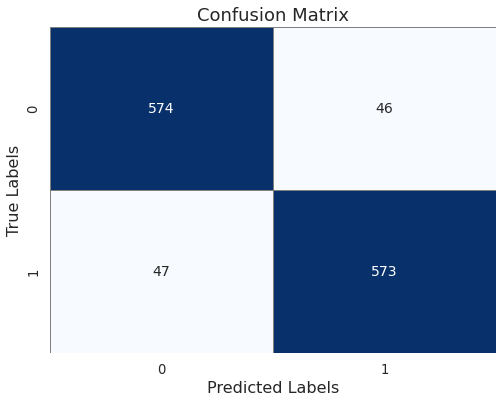

In [97]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font scale for better readability
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={"size": 14}, linewidths=0.5, linecolor='gray')
plt.xlabel('Predicted Labels', fontsize=16)
plt.ylabel('True Labels', fontsize=16)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [98]:
# Print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       620
           1       0.93      0.92      0.92       620

    accuracy                           0.93      1240
   macro avg       0.93      0.93      0.92      1240
weighted avg       0.93      0.93      0.92      1240



### calculate the ROC curve and AUC (Area Under the Curve) for Random Forest model

AUC: 0.9792221644120709


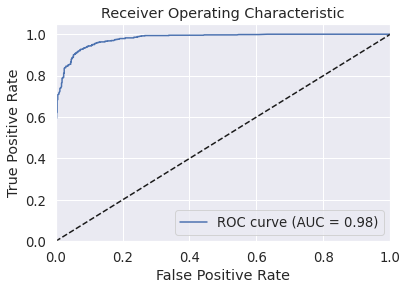

In [99]:
# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC (Area Under the Curve)
auc_score = auc(fpr, tpr)

# Print the AUC score
print("AUC:", auc_score)

# Plot the ROC curve
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

## 2- SVM Model

training a Support Vector Machine Classifier. 

**Call the SVC() model from sklearn and fit the model to the training data.**

In [100]:
from sklearn.svm import SVC

In [101]:
svc_model = SVC(probability= True, kernel= 'rbf')

In [102]:
svc_model.fit(X_train,y_train)

SVC(probability=True)

In [103]:
# Perform cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(svc_model, X_train, y_train, cv=cv, scoring='accuracy')

# Print the accuracy scores for each fold
for fold, score in enumerate(scores):
    print(f"Fold {fold+1}: Accuracy = {score}")

# Calculate and print the mean accuracy across all folds
mean_accuracy = scores.mean()
print(f"Mean Accuracy: {mean_accuracy}")


Fold 1: Accuracy = 0.9381107491856677
Fold 2: Accuracy = 0.925
Fold 3: Accuracy = 0.925
Fold 4: Accuracy = 0.9456521739130435
Fold 5: Accuracy = 0.9282608695652174
Mean Accuracy: 0.9324047585327857


In [104]:
predictions = svc_model.predict(X_test)

In [105]:
print(confusion_matrix(y_test,predictions))

[[570  50]
 [ 57 563]]


In [106]:
y_pred_proba = svc_model.predict_proba(X_test)[:, 1].reshape(-1, 1)
result = np.concatenate((predictions.reshape(len(predictions), 1), y_pred_proba, y_test.reshape(len(y_test), 1)), axis=1)
print(result)

[[0.         0.48562792 1.        ]
 [1.         0.97276318 1.        ]
 [1.         0.93374956 1.        ]
 ...
 [0.         0.00256587 0.        ]
 [0.         0.00178291 0.        ]
 [0.         0.00803633 0.        ]]


AUC: 0.970824661810614


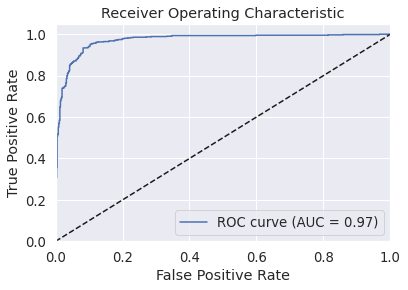

In [107]:
# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC (Area Under the Curve)
auc_score = auc(fpr, tpr)

# Print the AUC score
print("AUC:", auc_score)

# Plot the ROC curve
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

## Training Deep Learning Models

### ANN model

In [149]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split

In [150]:
# X_train, X_test, y_train, y_test
# Loading data
X_train = enc_train.iloc[:, :-1].values
y_train = enc_train.iloc[:, -1].values

X_test = enc_test.iloc[:, :-1].values
y_test = enc_test.iloc[:, -1].values

In [151]:
# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [152]:
# ANN Model Definition with more hidden layers
model_ann = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid') # Binary classification
])

# Compile the model
model_ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [153]:
# Compile the model
model_ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [154]:
# Reshape data for ANN input
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

In [155]:
# Convert the target to numpy arrays
y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()

In [156]:
# Train the model
model_ann.fit(X_train_reshaped, y_train_np, epochs=70, batch_size=32, validation_split=0.2)


Epoch 1/70
115/115 [==============================] - 2s 6ms/step - loss: 0.5125 - accuracy: 0.7288 - val_loss: 0.5265 - val_accuracy: 0.8024
Epoch 2/70
115/115 [==============================] - 0s 3ms/step - loss: 0.3059 - accuracy: 0.8543 - val_loss: 0.5072 - val_accuracy: 0.7666
Epoch 3/70
115/115 [==============================] - 0s 4ms/step - loss: 0.2599 - accuracy: 0.8861 - val_loss: 0.5127 - val_accuracy: 0.7872
Epoch 4/70
115/115 [==============================] - 0s 4ms/step - loss: 0.2224 - accuracy: 0.9000 - val_loss: 0.6042 - val_accuracy: 0.7524
Epoch 5/70
115/115 [==============================] - 0s 4ms/step - loss: 0.2027 - accuracy: 0.9130 - val_loss: 0.6095 - val_accuracy: 0.7687
Epoch 6/70
115/115 [==============================] - 0s 4ms/step - loss: 0.1980 - accuracy: 0.9152 - val_loss: 0.6209 - val_accuracy: 0.7557
Epoch 7/70
115/115 [==============================] - 0s 3ms/step - loss: 0.1793 - accuracy: 0.9247 - val_loss: 0.6267 - val_accuracy: 0.7709
Epoch 

In [157]:
# Evaluate the model
loss, accuracy = model_ann.evaluate(X_test_reshaped, y_test_np)
print(f'Test Accuracy: {accuracy}')

39/39 [==============================] - 0s 2ms/step - loss: 0.7300 - accuracy: 0.8702
Test Accuracy: 0.8701612949371338


In [158]:
# Predict probabilities for ROC curve
y_pred_proba_ann = model_ann.predict(X_test_reshaped).ravel()


39/39 [==============================] - 0s 2ms/step


In [159]:
# Calculate ROC curve
fpr_ann, tpr_ann, thresholds_ann = roc_curve(y_test_np, y_pred_proba_ann)
roc_auc_ann = auc(fpr_ann, tpr_ann)


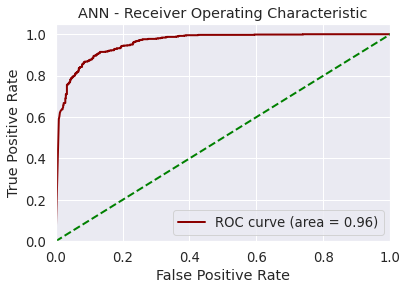

In [160]:
# Plot ROC curve
plt.figure()
plt.plot(fpr_ann, tpr_ann, color='darkred', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_ann)
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ANN - Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### CNN model

In [162]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout, MaxPooling2D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [163]:
# Loading data
X_train = enc_train.iloc[:, :-1].values
y_train = enc_train.iloc[:, -1].values

X_test = enc_test.iloc[:, :-1].values
y_test = enc_test.iloc[:, -1].values

In [164]:
# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [165]:
# Reshape data for CNN input
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

In [166]:
# Convert the target to numpy arrays
y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()

In [167]:
# Define the CNN model
model_cnn = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)),
    Dropout(0.5),
    Flatten(),
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid') # Binary classification
])

In [168]:
# Compile the model
model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [171]:
# Train the model
model_cnn.fit(X_train_reshaped, y_train_np, epochs=70, batch_size=32, validation_split=0.2)

Epoch 1/70
115/115 [==============================] - 2s 14ms/step - loss: 0.0776 - accuracy: 0.9723 - val_loss: 3.0286 - val_accuracy: 0.6743
Epoch 2/70
115/115 [==============================] - 2s 13ms/step - loss: 0.0803 - accuracy: 0.9671 - val_loss: 3.1395 - val_accuracy: 0.6927
Epoch 3/70
115/115 [==============================] - 2s 15ms/step - loss: 0.0655 - accuracy: 0.9739 - val_loss: 3.7152 - val_accuracy: 0.6982
Epoch 4/70
115/115 [==============================] - 2s 14ms/step - loss: 0.0701 - accuracy: 0.9693 - val_loss: 3.6828 - val_accuracy: 0.6971
Epoch 5/70
115/115 [==============================] - 2s 15ms/step - loss: 0.0779 - accuracy: 0.9682 - val_loss: 4.5561 - val_accuracy: 0.6374
Epoch 6/70
115/115 [==============================] - 2s 19ms/step - loss: 0.0765 - accuracy: 0.9682 - val_loss: 5.7520 - val_accuracy: 0.6145
Epoch 7/70
115/115 [==============================] - 2s 15ms/step - loss: 0.0674 - accuracy: 0.9734 - val_loss: 4.2632 - val_accuracy: 0.6830

In [172]:
# Evaluate the model
loss, accuracy = model_cnn.evaluate(X_test_reshaped, y_test_np)
print(f'Test Accuracy: {accuracy}')

39/39 [==============================] - 0s 4ms/step - loss: 1.1036 - accuracy: 0.8782
Test Accuracy: 0.8782258033752441


In [173]:
# Get the predicted probabilities for the positive class
predicted_probabilities = model_cnn.predict(X_test_reshaped)

39/39 [==============================] - 0s 3ms/step


In [174]:
# Convert probabilities to predicted classes (0 or 1) based on a 0.5 threshold
predicted_classes = (predicted_probabilities >= 0.5).astype(int)

In [175]:
# Flatten arrays for concatenation
predicted_probabilities_flat = predicted_probabilities.flatten()
predicted_classes_flat = predicted_classes.flatten()


In [176]:
# Concatenate the predicted classes, predicted probabilities, and actual test labels
result = np.column_stack((predicted_classes_flat, predicted_probabilities_flat, y_test_np))


In [177]:
# Optionally, convert to a DataFrame for easier viewing
result_df = pd.DataFrame(result, columns=['Predicted_Class', 'Predicted_Probability', 'Actual_Class'])

In [178]:
# Display the first few rows of the result
print(result_df.head())

   Predicted_Class  Predicted_Probability  Actual_Class
0              0.0               0.001675           1.0
1              1.0               0.999771           1.0
2              1.0               0.997022           1.0
3              1.0               0.999993           1.0
4              1.0               0.979559           1.0


In [179]:
# Predict probabilities for ROC curve
y_pred_proba = model_cnn.predict(X_test_reshaped).ravel()

39/39 [==============================] - 0s 4ms/step


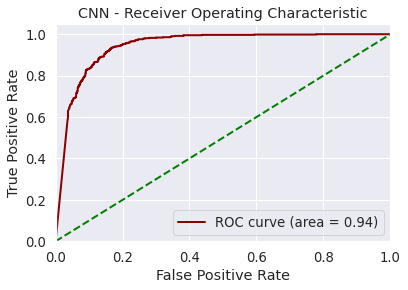

In [180]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test_np, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkred', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('CNN - Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Implementing Grey Wolf Optimizer

### * INCOMPLETE SECTOIN *

In [122]:
def create_model(hyperparameters):
    model = Sequential([
        Conv1D(hyperparameters['conv_filters'], kernel_size=3, activation='relu', input_shape=(input_shape, 1)),
        Flatten(),
        Dense(hyperparameters['dense_neurons'], activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [123]:
def objective_function(hyperparameters):
    model = create_model(hyperparameters)
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    return -accuracy  # Since GWO minimizes the function, and we want to maximize accuracy

In [124]:
class GreyWolfOptimizer:
    def __init__(self, objective_func, lb, ub, dim, num_wolves, num_iterations):
        self.objective_func = objective_function
        self.lb = lb  # Lower bound of hyperparameters
        self.ub = ub  # Upper bound of hyperparameters
        self.dim = dim  # Number of dimensions (hyperparameters)
        self.num_wolves = num_wolves
        self.num_iterations = num_iterations
        self.alpha, self.beta, self.delta = None, None, None  # Top three wolves
        self.wolves = np.random.uniform(lb, ub, (num_wolves, dim))  # Initialize wolf positions

    def optimize(self):
        for _ in range(self.num_iterations):
            # Evaluate wolves and update alpha, beta, delta
            # Update positions of wolves
            # ...

        # Return the best hyperparameters (position of the alpha wolf)
        return self.alpha

# Example usage
def objective_function(hyperparameters):
    # Build, train, and evaluate your model
    pass

gwo = GreyWolfOptimizer(
    objective_func=objective_function, 
    lb=[0.001, 10],  # Example lower bounds
    ub=[0.01, 100],  # Example upper bounds
    dim=2,  # Number of hyperparameters
    num_wolves=10,
    num_iterations=20
)
best_hyperparams = gwo.optimize()


IndentationError: expected an indented block (1065354549.py, line 19)

In [ ]:
def objective_function(hyperparams):
    # Create and compile the model with given hyperparameters
    model = Sequential([
        Conv1D(hyperparams['conv_filters'], kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)),
        Dropout(0.5),
        Flatten(),
        Dense(hyperparams['dense_neurons'], activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Fit the model (consider using a smaller number of epochs for speed)
    model.fit(X_train_reshaped, y_train_np, epochs=5, batch_size=32, verbose=0)
    
    # Evaluate the model
    loss, accuracy = model.evaluate(X_test_reshaped, y_test_np, verbose=0)
    return accuracy  # or return -loss if you want to minimize loss


In [ ]:
def grey_wolf_optimizer(objective_func, hyperparam_space, num_wolves, num_iterations):
    # Initialize wolves (solutions)
    # For each iteration:
    #   Evaluate wolves using the objective function
    #   Update the position of wolves based on GWO/ICA algorithm
    #   ...
    # Return the best solution (hyperparameters)
    pass


In [ ]:
best_hyperparams = grey_wolf_optimizer(
    objective_function=objective_function, 
    hyperparam_space={'conv_filters': [16, 32, 64], 'dense_neurons': [10, 50, 100]},
    num_wolves=5,
    num_iterations=10
)


In [ ]:
final_model = Sequential([
    Conv1D(best_hyperparams['conv_filters'], kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)),
    Dropout(0.5),
    Flatten(),
    Dense(best_hyperparams['dense_neurons'], activation='relu'),
    Dense(1, activation='sigmoid')
])
final_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
final_model.fit(X_train_reshaped, y_train_np, epochs=10, batch_size=32, validation_split=0.2)


### CNN-Random search
#### Random Search technique for hyperparameter optimization for CNN model
here is the complete code to utilize the random search technique for hyperparameter optimization in CNN and train the model with the best-found hyperparameters

In [181]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import keras_tuner as kt
from keras_tuner import RandomSearch


In [182]:
# Load data
X_train = enc_train.iloc[:, :-1].values
y_train = enc_train.iloc[:, -1].values
X_test = enc_test.iloc[:, :-1].values
y_test = enc_test.iloc[:, -1].values

In [183]:
# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [184]:
# Reshape data for CNN input
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

In [185]:
# Define the model builder function
def build_model(hp):
    model = Sequential()
    model.add(Conv1D(filters=hp.Int('conv_filters', min_value=32, max_value=128, step=32),
                     kernel_size=hp.Choice('kernel_size', values=[3, 5]),
                     activation='relu',
                     input_shape=(X_train_reshaped.shape[1], 1)))
    model.add(Flatten())
    model.add(Dense(units=hp.Int('dense_units', min_value=50, max_value=150, step=50),
                    activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [186]:
# Set up the Random Search tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='my_dir',
    project_name='cnn_hyperparam_optimization'
)

Reloading Tuner from my_dir/cnn_hyperparam_optimization/tuner0.json


In [187]:
# Perform hyperparameter tuning
tuner.search(X_train_reshaped, y_train, epochs=30, validation_split=0.2)

In [188]:
# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [189]:
# Build the model with the best hyperparameters
model = tuner.hypermodel.build(best_hps)

In [190]:
# Convert y_train from Pandas Categorical to NumPy array
y_train_np = y_train.to_numpy()

# Train the final model with the NumPy array
model.fit(X_train_reshaped, y_train_np, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
115/115 [==============================] - 3s 20ms/step - loss: 0.2849 - accuracy: 0.8663 - val_loss: 0.9163 - val_accuracy: 0.6417
Epoch 2/20
115/115 [==============================] - 2s 19ms/step - loss: 0.1983 - accuracy: 0.9147 - val_loss: 1.4449 - val_accuracy: 0.5212
Epoch 3/20
115/115 [==============================] - 2s 19ms/step - loss: 0.1732 - accuracy: 0.9277 - val_loss: 1.1357 - val_accuracy: 0.6037
Epoch 4/20
115/115 [==============================] - 2s 21ms/step - loss: 0.1444 - accuracy: 0.9410 - val_loss: 0.8213 - val_accuracy: 0.7144
Epoch 5/20
115/115 [==============================] - 3s 23ms/step - loss: 0.1337 - accuracy: 0.9424 - val_loss: 1.1160 - val_accuracy: 0.6862
Epoch 6/20
115/115 [==============================] - 2s 21ms/step - loss: 0.1160 - accuracy: 0.9503 - val_loss: 1.1731 - val_accuracy: 0.6591
Epoch 7/20
115/115 [==============================] - 2s 20ms/step - loss: 0.1104 - accuracy: 0.9563 - val_loss: 1.0747 - val_accuracy: 0.7101

In [191]:
# Convert y_test from Pandas Categorical to NumPy array if it's not already
y_test_np = y_test.to_numpy()

# Evaluate the model
loss, accuracy = model.evaluate(X_test_reshaped, y_test_np)
print(f'Test Accuracy: {accuracy}')

39/39 [==============================] - 0s 4ms/step - loss: 0.8187 - accuracy: 0.8653
Test Accuracy: 0.8653225898742676


In [192]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predict probabilities
y_pred_proba = model.predict(X_test_reshaped).ravel()

39/39 [==============================] - 0s 3ms/step


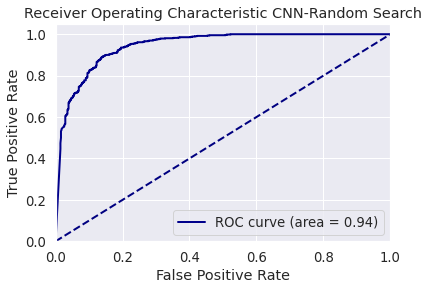

In [193]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test_np, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkblue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic CNN-Random Search')
plt.legend(loc="lower right")
plt.show()

### CNN-Genetic
#### Genetic Algorithm for Hyperparameter tuning
Genetic Algorithm Implementation for Hyperparameter Tuning:

- Initialization: Created an initial population of individuals, where each individual represents a set of hyperparameters for the CNN model.
- Fitness Function: Defined compute_fitness, which evaluates the performance of the CNN model (using accuracy as the metric) based on the individual's hyperparameters.
- Selection: Implemented a process to retain the best-performing individuals (top 2 in this case) in each generation.
- Crossover and Mutation: Applied genetic operations to generate new individuals (offspring) by combining and mutating the hyperparameters of selected individuals.
- Iterations: Repeated this process for a specified number of generations (5 in the example).
- Best Hyperparameters: Identified the best set of hyperparameters after all generations.
- Final Model Training and Evaluation:

Used the best-found hyperparameters to build and train the final CNN model.
Evaluated the model's performance on the test dataset.

In [182]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout
from sklearn.preprocessing import StandardScaler
import random

In [183]:
# Assuming you have loaded your data into enc_train and enc_test
X_train = enc_train.iloc[:, :-1].values
y_train = enc_train.iloc[:, -1].values
X_test = enc_test.iloc[:, :-1].values
y_test = enc_test.iloc[:, -1].values

In [184]:
# Convert to NumPy arrays and ensure dtype is float32
X_train = np.array(X_train, dtype='float32')
X_test = np.array(X_test, dtype='float32')
y_train = np.array(y_train, dtype='float32')
y_test = np.array(y_test, dtype='float32')

In [185]:
# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [186]:
# Reshape data for CNN input
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

In [187]:
# Define the CNN model
def build_model(hyperparameters):
    model = Sequential([
        Conv1D(hyperparameters['conv_filters'], kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)),
        Flatten(),
        Dense(hyperparameters['dense_units'], activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [188]:
# Genetic Algorithm Functions
def create_individual():
    return {'conv_filters': random.choice([32, 64, 128]), 'dense_units': random.choice([50, 100, 150])}

def compute_fitness(individual):
    model = build_model(individual)
    model.fit(X_train_reshaped, y_train, epochs=5, verbose=0)  # Reduced epochs for faster computation
    loss, accuracy = model.evaluate(X_test_reshaped, y_test, verbose=0)
    return accuracy

def crossover(ind1, ind2):
    child = ind1.copy()
    for key in ind1:
        child[key] = ind1[key] if random.random() > 0.5 else ind2[key]
    return child

def mutate(individual):
    mutation_key = random.choice(list(individual.keys()))
    individual[mutation_key] = create_individual()[mutation_key]
    return individual

In [189]:
# Running the Genetic Algorithm
population_size = 10
num_generations = 5
population = [create_individual() for _ in range(population_size)]

In [190]:
for generation in range(num_generations):
    print(f"Generation {generation}")
    fitness_scores = [compute_fitness(individual) for individual in population]
    sorted_population = [x for _, x in sorted(zip(fitness_scores, population), key=lambda pair: pair[0], reverse=True)]
    population = sorted_population[:2]  # Keep the top 2
    while len(population) < population_size:
        if random.random() > 0.1:  # 90% crossover
            ind1, ind2 = random.sample(population[:4], 2)  # Select from top 4
            child = crossover(ind1, ind2)
        else:  # 10% mutation
            child = mutate(random.choice(population))
        population.append(child)

best_individual = population[0]
print("Best Hyperparameters:", best_individual)


Generation 0
Generation 1
Generation 2
Generation 3
Generation 4
Best Hyperparameters: {'conv_filters': 128, 'dense_units': 150}


Epoch 1/30
115/115 [==============================] - 5s 31ms/step - loss: 0.2889 - accuracy: 0.8598 - val_loss: 0.4819 - val_accuracy: 0.8165
Epoch 2/30
115/115 [==============================] - 3s 29ms/step - loss: 0.1924 - accuracy: 0.9166 - val_loss: 0.9932 - val_accuracy: 0.6526
Epoch 3/30
115/115 [==============================] - 3s 27ms/step - loss: 0.1708 - accuracy: 0.9261 - val_loss: 1.0196 - val_accuracy: 0.6754
Epoch 4/30
115/115 [==============================] - 4s 31ms/step - loss: 0.1472 - accuracy: 0.9391 - val_loss: 1.1695 - val_accuracy: 0.6743
Epoch 5/30
115/115 [==============================] - 4s 32ms/step - loss: 0.1358 - accuracy: 0.9454 - val_loss: 1.1359 - val_accuracy: 0.6764
Epoch 6/30
115/115 [==============================] - 4s 31ms/step - loss: 0.1174 - accuracy: 0.9519 - val_loss: 0.9177 - val_accuracy: 0.7546
Epoch 7/30
115/115 [==============================] - 4s 30ms/step - loss: 0.1079 - accuracy: 0.9563 - val_loss: 1.9813 - val_accuracy: 0.5472

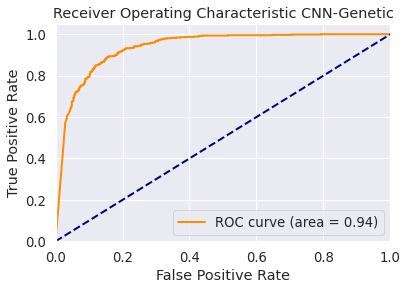

In [191]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import random

# Train the final model with the best hyperparameters
final_model = build_model(best_individual)
final_model.fit(X_train_reshaped, y_train, epochs=30, validation_split=0.2)

# Evaluate the final model
final_loss, final_accuracy = final_model.evaluate(X_test_reshaped, y_test)
print("Final Model Accuracy:", final_accuracy)

# Predict probabilities for ROC curve
y_pred_proba = final_model.predict(X_test_reshaped).ravel()

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic CNN-Genetic')
plt.legend(loc="lower right")
plt.show()


### CNN-Bayesian Optimization

Reloading Tuner from keras_tuner_dir/cnn_optimization/tuner0.json
Best hyperparameters: {'conv_filters': 96, 'kernel_size': 5, 'dense_units': 50, 'dropout': 0.35000000000000003}
Epoch 1/50
115/115 [==============================] - 4s 12ms/step - loss: 0.3121 - accuracy: 0.8421 - val_loss: 0.6117 - val_accuracy: 0.7134
Epoch 2/50
115/115 [==============================] - 1s 7ms/step - loss: 0.2186 - accuracy: 0.9008 - val_loss: 0.8085 - val_accuracy: 0.6667
Epoch 3/50
115/115 [==============================] - 1s 7ms/step - loss: 0.1949 - accuracy: 0.9111 - val_loss: 0.7076 - val_accuracy: 0.7448
Epoch 4/50
115/115 [==============================] - 1s 8ms/step - loss: 0.1824 - accuracy: 0.9201 - val_loss: 0.8814 - val_accuracy: 0.6580
Epoch 5/50
115/115 [==============================] - 1s 9ms/step - loss: 0.1736 - accuracy: 0.9318 - val_loss: 1.1742 - val_accuracy: 0.6482
Epoch 6/50
115/115 [==============================] - 1s 7ms/step - loss: 0.1590 - accuracy: 0.9380 - val_loss:

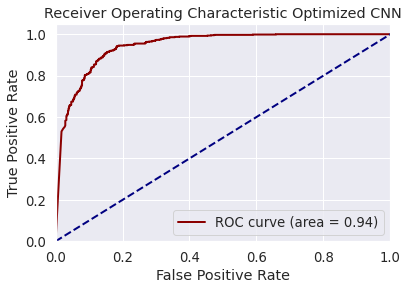

In [226]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming X_train_reshaped, y_train, X_test_reshaped, y_test are already defined

def build_model(hp):
    model = Sequential([
        Conv1D(
            filters=hp.Int('conv_filters', min_value=32, max_value=128, step=32),
            kernel_size=hp.Choice('kernel_size', values=[3, 5]),
            activation='relu',
            input_shape=(X_train_reshaped.shape[1], 1)
        ),
        Flatten(),
        Dense(
            units=hp.Int('dense_units', min_value=50, max_value=150, step=50),
            activation='relu'
        ),
        Dropout(hp.Float('dropout', min_value=0.0, max_value=0.5, default=0.25, step=0.05)),
        Dense(1, activation='sigmoid')
    ])
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

tuner = kt.BayesianOptimization(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # Adjust the number of trials
    directory='keras_tuner_dir',
    project_name='cnn_optimization'
)

tuner.search(
    X_train_reshaped, y_train,
    epochs=30,
    validation_split=0.2
)

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best hyperparameters: {best_hps.values}")

# Build the model with the best hyperparameters and train it on the data
optimized_cnn_model = tuner.hypermodel.build(best_hps)
history = optimized_cnn_model.fit(X_train_reshaped, y_train, epochs=50, validation_split=0.2)

# Evaluate the final optimized model
loss, accuracy = optimized_cnn_model.evaluate(X_test_reshaped, y_test)
print("Final Optimized Model Accuracy:", accuracy)

# Predict probabilities for ROC curve for the optimized model
y_pred_proba_optimized = optimized_cnn_model.predict(X_test_reshaped).ravel()

# Compute ROC Curve and AUC for the optimized model
fpr_optimized, tpr_optimized, thresholds = roc_curve(y_test, y_pred_proba_optimized)
roc_auc_optimized = auc(fpr_optimized, tpr_optimized)

# Plot ROC curve for the optimized model
plt.figure()
plt.plot(fpr_optimized, tpr_optimized, color='darkred', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_optimized)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Optimized CNN')
plt.legend(loc="lower right")
plt.show()


### CNN-AutoML
#### Using AutoML for optimizing CNN model

In [166]:
# Assuming your data is already loaded into enc_train and enc_test
X_train = enc_train.iloc[:, :-1].values
y_train = enc_train.iloc[:, -1].values
X_test = enc_test.iloc[:, :-1].values
y_test = enc_test.iloc[:, -1].values

In [167]:
# Convert to NumPy arrays and ensure dtype is float32
X_train = np.array(X_train, dtype='float32')
X_test = np.array(X_test, dtype='float32')
y_train = np.array(y_train, dtype='float32')
y_test = np.array(y_test, dtype='float32')


In [168]:
# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Using TensorFlow backend
Reloading Tuner from ./structured_data_classifier/tuner0.json
Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
Epoch 1/10
144/144 [==============================] - 3s 5ms/step - loss: 0.5543 - accuracy: 0.8496
Epoch 2/10
144/144 [==============================] - 1s 6ms/step - loss: 0.5452 - accuracy: 0.7264
Epoch 3/10
144/144 [==============================] - 1s 5ms/step - loss: 0.4132 - accuracy: 0.8166
Epoch 4/10
144/144 [==============================] - 1s 5ms/step - loss: 0.3401 - accuracy: 0.7859
Epoch 5/10
144/144 [==============================] - 1s 5ms/step - loss: 0.3320 - accuracy: 0.7879
Epoch 6/10
144/144 [==============================] - 1s 5ms/step - loss: 0.3119 - accuracy: 0.8203
Epoch 7/10
144/144 [==============================] - 1s 6ms/step - loss: 0.2394 - accuracy: 0.8792
Epoch 8/10
1

INFO:tensorflow:Assets written to: ./structured_data_classifier/best_model/assets


INFO:tensorflow:Assets written to: ./structured_data_classifier/best_model/assets


39/39 [==============================] - 1s 5ms/step - loss: 0.3161 - accuracy: 0.8653
Test Accuracy: 0.8653225898742676
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 52)]              0         
                                                                 
 multi_category_encoding (Mu  (None, 52)               0         
 ltiCategoryEncoding)                                            
                                                                 
 normalization (Normalizatio  (None, 52)               105       
 n)                                                              
                                                                 
 dense (Dense)               (None, 512)               27136     
                                                                 
 re_lu (ReLU)                (None, 512)               0         
      

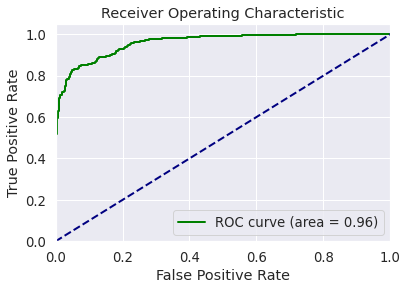

In [174]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import autokeras as ak


# Convert to NumPy arrays and ensure dtype is float32
X_train = np.array(X_train, dtype='float32')
X_test = np.array(X_test, dtype='float32')
y_train = np.array(y_train, dtype='float32')
y_test = np.array(y_test, dtype='float32')

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the AutoKeras structured data classifier (or another appropriate classifier)
clf = ak.StructuredDataClassifier(max_trials=10, loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
clf.fit(X_train_scaled, y_train, epochs=10)

# Evaluate the best model
loss, accuracy = clf.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy}")

# Export the best model
model = clf.export_model()
model.summary()

# Evaluate the model with correct data
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {accuracy}')

# Predict probabilities for ROC curve
y_pred_proba = model.predict(X_test_scaled).ravel()

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='green', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


### LSTM and BiLSTM

In [196]:
from tensorflow.keras.layers import LSTM, Bidirectional

In [197]:
# LSTM Model
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(50))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [198]:
# BiLSTM Model
def build_bilstm_model(input_shape):
    model = Sequential()
    model.add(Bidirectional(LSTM(50, return_sequences=True), input_shape=input_shape))
    model.add(Bidirectional(LSTM(50)))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [199]:
# Train and Evaluate LSTM Model
lstm_model = build_lstm_model(X_train_reshaped.shape[1:])
lstm_model.fit(X_train_reshaped, y_train, epochs=30, validation_split=0.2)
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test_reshaped, y_test)
print(f"LSTM Model Accuracy: {lstm_accuracy}")

# Train and Evaluate BiLSTM Model
bilstm_model = build_bilstm_model(X_train_reshaped.shape[1:])
bilstm_model.fit(X_train_reshaped, y_train, epochs=30, validation_split=0.2)
bilstm_loss, bilstm_accuracy = bilstm_model.evaluate(X_test_reshaped, y_test)
print(f"BiLSTM Model Accuracy: {bilstm_accuracy}")

Epoch 1/30
115/115 [==============================] - 13s 75ms/step - loss: 0.4681 - accuracy: 0.7622 - val_loss: 1.1256 - val_accuracy: 0.6232
Epoch 2/30
115/115 [==============================] - 8s 71ms/step - loss: 0.3529 - accuracy: 0.8280 - val_loss: 1.1902 - val_accuracy: 0.6254
Epoch 3/30
115/115 [==============================] - 8s 68ms/step - loss: 0.3387 - accuracy: 0.8220 - val_loss: 1.3962 - val_accuracy: 0.5396
Epoch 4/30
115/115 [==============================] - 16s 141ms/step - loss: 0.3225 - accuracy: 0.8386 - val_loss: 1.3336 - val_accuracy: 0.5429
Epoch 5/30
115/115 [==============================] - 20s 174ms/step - loss: 0.3152 - accuracy: 0.8391 - val_loss: 1.7008 - val_accuracy: 0.5385
Epoch 6/30
115/115 [==============================] - 21s 182ms/step - loss: 0.3041 - accuracy: 0.8478 - val_loss: 1.3003 - val_accuracy: 0.6135
Epoch 7/30
115/115 [==============================] - 29s 249ms/step - loss: 0.2946 - accuracy: 0.8495 - val_loss: 1.7317 - val_accurac

In [200]:
# Predict probabilities for LSTM
lstm_pred_proba = lstm_model.predict(X_test_reshaped).ravel()

# Calculate ROC curve for LSTM
lstm_fpr, lstm_tpr, _ = roc_curve(y_test, lstm_pred_proba)
lstm_roc_auc = auc(lstm_fpr, lstm_tpr)


39/39 [==============================] - 3s 31ms/step


In [201]:
# Predict probabilities for BiLSTM
bilstm_pred_proba = bilstm_model.predict(X_test_reshaped).ravel()

# Calculate ROC curve for BiLSTM
bilstm_fpr, bilstm_tpr, _ = roc_curve(y_test, bilstm_pred_proba)
bilstm_roc_auc = auc(bilstm_fpr, bilstm_tpr)


39/39 [==============================] - 4s 44ms/step


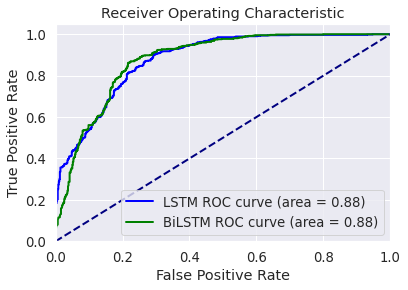

In [202]:
# Plot ROC curves
plt.figure()
plt.plot(lstm_fpr, lstm_tpr, color='blue', lw=2, label='LSTM ROC curve (area = %0.2f)' % lstm_roc_auc)
plt.plot(bilstm_fpr, bilstm_tpr, color='green', lw=2, label='BiLSTM ROC curve (area = %0.2f)' % bilstm_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


### LSTM-Bayesian Optimization

In [221]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

def build_lstm_model(hp):
    model = Sequential()
    model.add(LSTM(
        units=hp.Int('units', min_value=30, max_value=100, step=10),
        return_sequences=True,
        input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])
    ))
    model.add(Dropout(hp.Float('dropout_1', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(LSTM(
        units=hp.Int('units', min_value=30, max_value=100, step=10),
        return_sequences=False
    ))
    model.add(Dropout(hp.Float('dropout_2', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(
        units=hp.Int('dense_units', min_value=30, max_value=100, step=10),
        activation='relu'
    ))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

tuner_lstm = kt.BayesianOptimization(
    build_lstm_model,
    objective='val_accuracy',
    max_trials=10,
    directory='keras_tuner_dir',
    project_name='lstm_optimization'
)

tuner_lstm.search(
    X_train_reshaped, y_train,
    epochs=30,
    validation_split=0.2
)

best_hps_lstm = tuner_lstm.get_best_hyperparameters(num_trials=1)[0]


Trial 10 Complete [00h 03m 54s]
val_accuracy: 0.6427795886993408

Best val_accuracy So Far: 0.6427795886993408
Total elapsed time: 00h 51m 55s


### BiLSTM-Bayesian Optimization

In [222]:
from tensorflow.keras.layers import Bidirectional

def build_bilstm_model(hp):
    model = Sequential()
    model.add(Bidirectional(LSTM(
        units=hp.Int('units', min_value=30, max_value=100, step=10),
        return_sequences=True),
        input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])
    ))
    model.add(Dropout(hp.Float('dropout_1', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Bidirectional(LSTM(
        units=hp.Int('units', min_value=30, max_value=100, step=10),
        return_sequences=False)
    ))
    model.add(Dropout(hp.Float('dropout_2', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(
        units=hp.Int('dense_units', min_value=30, max_value=100, step=10),
        activation='relu'
    ))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

tuner_bilstm = kt.BayesianOptimization(
    build_bilstm_model,
    objective='val_accuracy',
    max_trials=10,
    directory='keras_tuner_dir',
    project_name='bilstm_optimization'
)

tuner_bilstm.search(
    X_train_reshaped, y_train,
    epochs=30,
    validation_split=0.2
)

best_hps_bilstm = tuner_bilstm.get_best_hyperparameters(num_trials=1)[0]


Trial 10 Complete [00h 08m 56s]
val_accuracy: 0.5439739227294922

Best val_accuracy So Far: 0.567861020565033
Total elapsed time: 01h 29m 42s


In [223]:
# Build and train LSTM model
optimized_lstm_model = tuner_lstm.hypermodel.build(best_hps_lstm)
history_lstm = optimized_lstm_model.fit(X_train_reshaped, y_train, epochs=50, validation_split=0.2)

# Build and train BiLSTM model
optimized_bilstm_model = tuner_bilstm.hypermodel.build(best_hps_bilstm)
history_bilstm = optimized_bilstm_model.fit(X_train_reshaped, y_train, epochs=50, validation_split=0.2)


Epoch 1/50
115/115 [==============================] - 17s 89ms/step - loss: 0.5250 - accuracy: 0.7226 - val_loss: 1.1709 - val_accuracy: 0.5516
Epoch 2/50
115/115 [==============================] - 8s 66ms/step - loss: 0.3706 - accuracy: 0.8171 - val_loss: 1.0356 - val_accuracy: 0.6059
Epoch 3/50
115/115 [==============================] - 8s 67ms/step - loss: 0.3483 - accuracy: 0.8247 - val_loss: 1.2354 - val_accuracy: 0.6167
Epoch 4/50
115/115 [==============================] - 8s 72ms/step - loss: 0.3361 - accuracy: 0.8285 - val_loss: 1.5593 - val_accuracy: 0.5516
Epoch 5/50
115/115 [==============================] - 8s 71ms/step - loss: 0.3286 - accuracy: 0.8326 - val_loss: 1.4805 - val_accuracy: 0.6189
Epoch 6/50
115/115 [==============================] - 8s 69ms/step - loss: 0.3204 - accuracy: 0.8375 - val_loss: 1.6368 - val_accuracy: 0.6080
Epoch 7/50
115/115 [==============================] - 8s 68ms/step - loss: 0.3122 - accuracy: 0.8378 - val_loss: 1.5482 - val_accuracy: 0.612

In [224]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def compute_roc_auc(model, X_test, y_test):
    y_pred_proba = model.predict(X_test).ravel()
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    return fpr, tpr, roc_auc

# Compute ROC for LSTM
lstm_fpr, lstm_tpr, lstm_roc_auc = compute_roc_auc(optimized_lstm_model, X_test_reshaped, y_test)

# Compute ROC for BiLSTM
bilstm_fpr, bilstm_tpr, bilstm_roc_auc = compute_roc_auc(optimized_bilstm_model, X_test_reshaped, y_test)


39/39 [==============================] - 4s 41ms/step


39/39 [==============================] - 2s 38ms/step


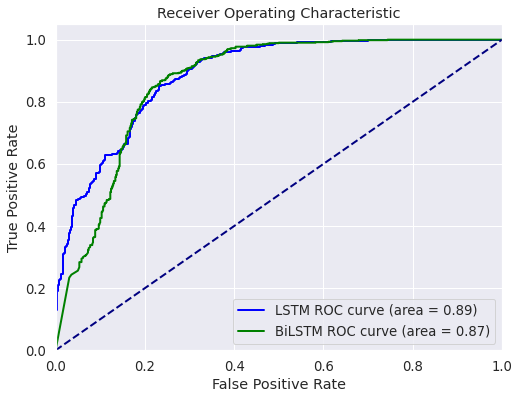

In [225]:
# Compute ROC for LSTM
lstm_fpr, lstm_tpr, lstm_roc_auc = compute_roc_auc(optimized_lstm_model, X_test_reshaped, y_test)

# Compute ROC for BiLSTM
bilstm_fpr, bilstm_tpr, bilstm_roc_auc = compute_roc_auc(optimized_bilstm_model, X_test_reshaped, y_test)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(lstm_fpr, lstm_tpr, color='blue', lw=2, label=f'LSTM ROC curve (area = {lstm_roc_auc:.2f})')
plt.plot(bilstm_fpr, bilstm_tpr, color='green', lw=2, label=f'BiLSTM ROC curve (area = {bilstm_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()